# Part I - Prosper Loan Dataset Exploration

## by Adaora Asika

## Introduction
> This project explores a dataset containing information about Prosper loan data. Prosper is an American peer-to-peer lending platform, with over 9 billion in funded loans. This dataset contains 113,937 loan listings with 81 variables for each loan.  A feature dictionary describing the variables in the dataset is available [here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0)

> I will explore features relating to Prosper borrowers demographic and loan listings to discover how they influence on Prosper loan distributions.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Use set option expand the output display of text
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.options.mode.chained_assignment = None

### Load and assess the dataset to determine wrangling steps required to get the features of interest.

In [3]:
df = pd.read_csv('prosperLoanData.csv')

In [4]:
df.shape

(113937, 81)

In [5]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [7]:
#descriptive statistics of  the dataset
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

In [8]:
# check unique credit ranking codes in CreditGrade feature
df['CreditGrade'].unique()

array(['C', nan, 'HR', 'AA', 'D', 'B', 'E', 'A', 'NC'], dtype=object)

In [9]:
# check unique length of loans in Term feature
df['Term'].unique()

array([36, 60, 12], dtype=int64)

In [10]:
# check unique loan statuses
df['LoanStatus'].unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

In [11]:
# Check unique credit ranking codes in ProsperRating (Alpha) feature
df['ProsperRating (Alpha)'].unique()

array([nan, 'A', 'D', 'B', 'E', 'C', 'AA', 'HR'], dtype=object)

In [12]:
# Check unique states in BorrowerState feature
df['BorrowerState'].unique()

array(['CO', 'GA', 'MN', 'NM', 'KS', 'CA', 'IL', 'MD', nan, 'AL', 'AZ',
       'VA', 'FL', 'PA', 'OR', 'MI', 'NY', 'LA', 'WI', 'OH', 'NC', 'WA',
       'NV', 'NJ', 'TX', 'AR', 'SC', 'DE', 'MO', 'NE', 'UT', 'DC', 'MA',
       'CT', 'IN', 'KY', 'OK', 'MS', 'WV', 'RI', 'TN', 'ID', 'MT', 'HI',
       'NH', 'VT', 'WY', 'ME', 'AK', 'IA', 'SD', 'ND'], dtype=object)

In [13]:
# count the number of unique borrower occupations
df['BorrowerState'].nunique()

51

In [14]:
# check unique borrower occupations
df['Occupation'].unique()

array(['Other', 'Professional', 'Skilled Labor', 'Executive',
       'Sales - Retail', 'Laborer', 'Food Service', 'Fireman',
       'Waiter/Waitress', 'Construction', 'Computer Programmer',
       'Sales - Commission', 'Retail Management', 'Engineer - Mechanical',
       'Military Enlisted', 'Clerical', nan, 'Teacher', 'Clergy',
       'Accountant/CPA', 'Attorney', 'Nurse (RN)', 'Analyst',
       "Nurse's Aide", 'Investor', 'Realtor', 'Flight Attendant',
       'Nurse (LPN)', 'Military Officer', 'Food Service Management',
       'Truck Driver', 'Administrative Assistant',
       'Police Officer/Correction Officer', 'Social Worker',
       'Tradesman - Mechanic', 'Medical Technician', 'Professor',
       'Postal Service', 'Civil Service', 'Pharmacist',
       'Tradesman - Electrician', 'Scientist', 'Dentist',
       'Engineer - Electrical', 'Architect', 'Landscaping',
       'Tradesman - Carpenter', 'Bus Driver', 'Tradesman - Plumber',
       'Engineer - Chemical', 'Doctor', 'Chemist',


In [15]:
# count the number of unique borrower occupations
df['Occupation'].nunique()

67

In [16]:
# check unique borrower occupations
df['ListingCategory (numeric)'].unique()

array([ 0,  2, 16,  1,  7, 13,  6, 15, 20, 19,  3, 18,  8,  4, 11, 14,  5,
        9, 17, 10, 12], dtype=int64)

In [17]:
# check unique borrower occupations
df['EmploymentStatus'].unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

In [18]:
# check unique borrower occupations
df['EmploymentStatus'].value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

### From inspecting the dataset and looking at the its feature dictionary, I will apply the following wrangling steps to derive the dataset of interest :

- The data dictionary shows that alphabetic credit rating of listings are different; pre-Jul 2009 the ratings are stored in `CreditGrade` variables and post-Jul 2009, they are stored in the `ProsperRating(Alpha)` variable. The two will be merged into one. 
    - I will also drop rows where the rating is `NC`from the merged column because it means there is No Credit Information 
    
- There are too many `occupations` listed (67). They will be grouped into categories based on International Standard Classification of Occupations (ISCO-08) classification standard.

- I will drop rows where loan status is `current, pastdue or finalpaymentinprogress`

- Replace `employed` values in employment status column with `Full-time`

- Rename `ListingCategory (numeric)` Category and map codes to descriptive names using data dictionary 
    - drop all values where `ListingCategory (numeric)` is `Not Available`

- Drop variables not useful or not of interest in the dataset
- Convert date columns to datetime format and save the clean dataset for exploration.

#### Merge credit rating variables

In [19]:
# Merge CreditGrade, ProsperRating(Alpha) columns
rating_columns = ['CreditGrade','ProsperRating (Alpha)']
other_columns = df.columns.difference(rating_columns)
credit_df= df.melt(id_vars = other_columns, value_vars = rating_columns,var_name = 'CredRatingType', value_name = 'CredRating')

In [20]:
# Drop redundant null value and NC- No Credit Info rows from the merged column
df = credit_df[~credit_df.CredRating.isnull()] 
df.head(0)

,AmountDelinquent,AvailableBankcardCredit,BankcardUtilization,BorrowerAPR,BorrowerRate,BorrowerState,ClosedDate,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,CurrentDelinquencies,CurrentlyInGroup,DateCreditPulled,DebtToIncomeRatio,DelinquenciesLast7Years,EmploymentStatus,EmploymentStatusDuration,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,FirstRecordedCreditLine,GroupKey,IncomeRange,IncomeVerifiable,InquiriesLast6Months,InvestmentFromFriendsAmount,InvestmentFromFriendsCount,Investors,IsBorrowerHomeowner,LP_CollectionFees,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_GrossPrincipalLoss,LP_InterestandFees,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,LP_ServiceFees,LenderYield,ListingCategory (numeric),ListingCreationDate,ListingKey,ListingNumber,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanKey,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,LoanStatus,MemberKey,MonthlyLoanPayment,Occupation,OnTimeProsperPayments,OpenCreditLines,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,PercentFunded,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ProsperRating (numeric),ProsperScore,PublicRecordsLast10Years,PublicRecordsLast12Months,Recommendations,RevolvingCreditBalance,ScorexChangeAtTimeOfListing,StatedMonthlyIncome,Term,TotalCreditLinespast7years,TotalInquiries,TotalProsperLoans,TotalProsperPaymentsBilled,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,CredRatingType,CredRating


In [21]:
# Drop NC- No Credit Info rows from the merged column
df= df[df.CredRating !='NC']

In [22]:
df.CredRating.value_counts()

C     23994
B     19970
D     19427
A     17866
E     13084
HR    10443
AA     8881
Name: CredRating, dtype: int64

#### Drop rows where loan status is `current` or `pastdue` or `lastpaymentinprogress`

In [23]:
loan_stat = ['Completed', 'Chargedoff', 'Defaulted', 'Cancelled']

In [24]:
df = df[df.LoanStatus.isin(loan_stat)]

In [25]:
df.LoanStatus.unique()

array(['Completed', 'Chargedoff', 'Defaulted', 'Cancelled'], dtype=object)

In [26]:
df.shape

(54817, 81)

#### Drop variables not useful or not of interest in the dataset

In [27]:
# Make a copy
df_original = df.copy()

In [28]:
# Keep only variables necessary for analysis
df.drop(['ListingKey','ListingNumber', 'ListingCreationDate','BorrowerRate','CreditScoreRangeUpper', 'CreditScoreRangeLower',
        'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss','IsBorrowerHomeowner',
       'EstimatedReturn', 'ProsperRating (numeric)','ProsperScore',
        'EmploymentStatusDuration','CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled','FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies','DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades','TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable',
        'LoanKey', 'TotalProsperLoans','TotalProsperPaymentsBilled', 'OnTimeProsperPayments',
       'ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate', 'ScorexChangeAtTimeOfListing',
       'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber',
       'LoanMonthsSinceOrigination', 'LoanNumber','LoanOriginationQuarter',
       'LP_CustomerPayments','LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees',
       'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss',
       'LP_NonPrincipalRecoverypayments', 'PercentFunded', 'Recommendations',
       'InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount','ProsperPrincipalBorrowed','ProsperPrincipalOutstanding',
       'Investors'], axis = 1 , inplace = True)

In [29]:
df.head()

,AmountDelinquent,BorrowerAPR,BorrowerState,ClosedDate,EmploymentStatus,ListingCategory (numeric),LoanOriginalAmount,LoanOriginationDate,LoanStatus,MemberKey,MonthlyLoanPayment,Occupation,StatedMonthlyIncome,Term,CredRatingType,CredRating
0,472.0,0.16516,CO,2009-08-14 00:00:00,Self-employed,0,9425,2007-09-12 00:00:00,Completed,1F3E3376408759268057EDA,330.43,Other,3083.333333,36,CreditGrade,C
2,NaN,0.28269,GA,2009-12-17 00:00:00,Not available,0,3001,2007-01-17 00:00:00,Completed,5F7033715035555618FA612,123.32,Other,2083.333333,36,CreditGrade,HR
11,2224.0,0.15033,NaN,2008-01-07 00:00:00,Full-time,0,1000,2007-10-18 00:00:00,Completed,59423376541417552B94BD3,33.81,Waiter/Waitress,1666.666667,36,CreditGrade,C
17,NaN,0.13202,NaN,2008-05-22 00:00:00,Not available,0,10000,2006-08-22 00:00:00,Chargedoff,893E3365582060699EBBADA,334.54,Professional,5833.333333,36,CreditGrade,AA
21,5200.0,0.21488,MI,2010-12-12 00:00:00,Full-time,0,3000,2007-12-12 00:00:00,Completed,27F53404042184361C6DCD9,112.64,Professional,3750.000000,36,CreditGrade,D


In [30]:
df.shape

(54817, 16)

#### Group the 67 occupations into 10 categories  based on ISCO-08 classification standard

In [31]:
job_cat_dict = {
    'Accountant/CPA': 'Professional',
    'Professionals': 'Professional',
    'Police Officer/Correction Officer': 'Service and Sales',
    'Sales - Retail': 'Service and Sales',
    'Administrative Assistant': 'Clerical',
    'Other': 'Other',
    'Construction': 'Elementary Worker',
    'Executive': 'Manager',
    'Medical Technician': 'Associate Professional',
    'Truck Driver': 'Machine Operator',
    'Food Service': 'Service and Sales',
    'Postal Service': 'Clerical',
    'Principal': 'Professional',
    'Teacher': 'Professional',
    'Analyst': 'Professional',
    'Engineer - Mechanical': 'Professional',
    'Computer Programmer': 'Professional',
    'Civil Service': 'Professional',
    'Nurse (RN)': 'Associate Professional',
    'Pilot - Private/Commercial': 'Professional',
    'Fireman': 'Associate Professional',
    'Sales - Commission': 'Service and Sales',
    'Clerical': 'Clerical',
    'Engineer - Electrical': 'Professional',
    'Tradesman - Electrician': 'Trades worker',
    'Retail Management': 'Manager',
    'Laborer': 'Elementary Worker',
    'Student - College Sophomore': 'Other',
    'Clergy': 'Professional',
    'Military Officer': 'Armed Forces',
    'Food Service Management': 'Manager',
    'Military Enlisted': 'Armed Forces',
    'Waiter/Waitress': 'Service and Sales',
    'Attorney': 'Professional',
    'Tradesman - Mechanic': 'Trades worker',
    'Pharmacist': 'Professional',
    'Social Worker': 'Associate Professional',
    'Skilled Labor': 'Other',
    'Realtor': 'Professional',
    'Religious': 'Professional',
    'Professor': 'Professional',
    'Flight Attendant': 'Service and Sales',
    'Scientist': 'Professional',
    'Student - College Senior': 'Other',
    'Nurse (LPN)': 'Professional',
    'Investor': 'Other',
    "Teacher's Aide": 'Clerical',
    'Bus Driver': 'Elementary Worker',
    'Student - College Freshman': 'Other',
    'Car Dealer': 'Other',
    'Homemaker': 'Other',
    "Nurse's Aide": 'Associate Professional',
    'Architect': 'Professional',
    'Landscaping': 'Elementary Worker',
    'Doctor': 'Professional',
    'Student - College Graduate Student': 'Other',
    'Tradesman - Carpenter': 'Trades worker', 
    'Student - College Junior': 'Other',
    'Dentist': 'Professional',
    'Student - Technical School': 'Other',
    'Student - Community College': 'Other',
    'Engineer - Chemical': 'Professional',
    'Tradesman - Plumber': 'Trades worker',
    'Chemist': 'Professional',
    'Biologist': 'Professional',
    'Psychologist': 'Professional',
    'Judge': 'Professional'
}

In [32]:
df['Occupation'].replace(job_cat_dict, inplace=True)
df['Occupation'].value_counts()

Professional              18209
Other                     16028
Service and Sales          4731
Clerical                   4057
Manager                    3448
Associate Professional     2060
Elementary Worker          1750
Armed Forces               1017
Trades worker               652
Machine Operator            639
Name: Occupation, dtype: int64

#### Replace `employed` values in employment status column with `Full-time`.

In [33]:
df['EmploymentStatus'].replace('Employed','Full-time',inplace=True)
df['EmploymentStatus'].value_counts()

Full-time        41333
Not available     5248
Self-employed     2922
Part-time         1049
Other              798
Retired            693
Not employed       561
Name: EmploymentStatus, dtype: int64

####  Rename numeric Listing Category and map numeric codes to descriptive names 

In [34]:
df.rename(columns={'ListingCategory (numeric)': 'LoanCategory'},inplace=True)
df.LoanCategory = df.LoanCategory.astype(str)
df.LoanCategory.replace({ '0' :'Not Available','1': 'Debt Consolidation', '2': 'Home Improvement',
                     '3': 'Business', '4': 'Personal', '5': 'Student',
                     '6': 'Auto', '7': 'Other', '8': 'Baby&Adoption', '9': 'Boat',
                     '10': 'Cosmetic Procedure', '11': 'Engagement Ring', '12': 'Green Loans',
                     '13': 'Household Expenses', '14': 'Large Purchases', '15': 'Medical/Dental', '16': 'Motorcycle',
                     '17': 'RV', '18': 'Taxes', '19': 'Vacation',
                     '20': 'Wedding Loans'},inplace=True) 

In [35]:
#drop all values where loan category is Not Available
df = df[df.LoanCategory !='Not Available'] 

In [36]:
df['LoanCategory'].value_counts()

Debt Consolidation    17802
Other                  6018
Business               4240
Home Improvement       3233
Personal               2395
Auto                   1532
Student                 750
Household Expenses      597
Medical/Dental          370
Taxes                   214
Vacation                198
Large Purchases         181
Wedding Loans           171
Motorcycle               94
Engagement Ring          63
Cosmetic Procedure       44
Baby&Adoption            40
Boat                     28
Green Loans              19
RV                       17
Name: LoanCategory, dtype: int64

#### Convert date columns to datetime type, save the clean dataset

In [37]:
# convert all date columns to datetime data type
df['ClosedDate']=pd.to_datetime(df['ClosedDate'])
df['LoanOriginationDate']=pd.to_datetime(df['LoanOriginationDate'])

In [38]:
# check dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38006 entries, 46 to 227872
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   AmountDelinquent     38000 non-null  float64       
 1   BorrowerAPR          38006 non-null  float64       
 2   BorrowerState        37965 non-null  object        
 3   ClosedDate           38006 non-null  datetime64[ns]
 4   EmploymentStatus     38006 non-null  object        
 5   LoanCategory         38006 non-null  object        
 6   LoanOriginalAmount   38006 non-null  int64         
 7   LoanOriginationDate  38006 non-null  datetime64[ns]
 8   LoanStatus           38006 non-null  object        
 9   MemberKey            38006 non-null  object        
 10  MonthlyLoanPayment   38006 non-null  float64       
 11  Occupation           37993 non-null  object        
 12  StatedMonthlyIncome  38006 non-null  float64       
 13  Term                 38006 no

In [39]:
# save the clean copy
df.to_csv('prosperLoanData_clean.csv', index = False)

### Loading my dataset

In [40]:
df = pd.read_csv('prosperLoanData_clean.csv')

In [41]:
df.shape

(38006, 16)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38006 entries, 0 to 38005
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AmountDelinquent     38000 non-null  float64
 1   BorrowerAPR          38006 non-null  float64
 2   BorrowerState        37965 non-null  object 
 3   ClosedDate           38006 non-null  object 
 4   EmploymentStatus     38006 non-null  object 
 5   LoanCategory         38006 non-null  object 
 6   LoanOriginalAmount   38006 non-null  int64  
 7   LoanOriginationDate  38006 non-null  object 
 8   LoanStatus           38006 non-null  object 
 9   MemberKey            38006 non-null  object 
 10  MonthlyLoanPayment   38006 non-null  float64
 11  Occupation           37993 non-null  object 
 12  StatedMonthlyIncome  38006 non-null  float64
 13  Term                 38006 non-null  int64  
 14  CredRatingType       38006 non-null  object 
 15  CredRating           38006 non-null 

In [43]:
# convert date columns to datetime data type
df['ClosedDate']=pd.to_datetime(df['ClosedDate'])
df['LoanOriginationDate']=pd.to_datetime(df['LoanOriginationDate'])

In [44]:
# express APR in percentage
df['APRPct'] = df.BorrowerAPR.apply(lambda x: x * 100)

In [45]:
# Check descriptive statistics of the dataset
df[['StatedMonthlyIncome','LoanOriginalAmount','AmountDelinquent',
    'MonthlyLoanPayment','Term']].describe()

,StatedMonthlyIncome,LoanOriginalAmount,AmountDelinquent,MonthlyLoanPayment,Term
count,38006.000000,38006.000000,38000.000000,38006.000000,38006.000000
mean,5219.661621,6271.836868,950.014395,225.691076,37.367153
std,6032.437627,4993.778756,6557.271944,177.717828,8.794927
min,0.000000,1000.000000,0.000000,0.000000,12.000000
25%,2916.666667,3000.000000,0.000000,104.770000,36.000000
50%,4333.333333,4500.000000,0.000000,173.710000,36.000000
75%,6416.666667,8000.000000,0.000000,305.477500,36.000000
max,618547.833333,35000.000000,327677.000000,2251.510000,60.000000


### What is the structure of your dataset?

> There are 38,006 loan listings in the dataset with 16 features. The variables are mostly qualitative with categorical features like EmploymentStatus,LoanCategory, LoanStatus, Occupation, Term, and credit rating, but there are also some numeric ones like the varaible of interest `LoanOriginalAmount`,  `BorrowerAPR`, and `StatedMonthlyIncome`. There are also two datetime data types `LoanOriginationDate` and `ClosedDate`

### What is/are the main feature(s) of interest in your dataset?

> I am interested in discovering how borrower demographic and loan listings features affect Prosper Loan listing distributions.


> I would like to discover what Borrower demographic feature and loans listing feature have the most effect on Prosper Loan listing distributions.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that Borrower demographics`(CredRating, BorrowerState, Occupation, StatedMonthlyIncome, EmploymentStatus)` will have the strongest effect on Loan listing distributions. I also think that and loans listings features`(BorrowerAPR and LoanCategory)` will have effects on listing distributions , though to a smaller degree.

## Univariate Exploration

In [46]:
#I will create a function that will rename x,y axis and chart title.
def chart_labels(x_label,y_label,title):
    plt.title(title, pad=20, fontsize=15)
    plt.xlabel(x_label,labelpad=15, fontsize=15)
    plt.ylabel(y_label, labelpad=10, fontsize=15)

In [47]:
#set style and colour for plots
sns.set_style('dark', {'xtick.bottom': True})
base_color=sns.color_palette('Paired_r', 6)[4]

### What is the distribution of the feature of interest  `LoanOriginalAmount` ?

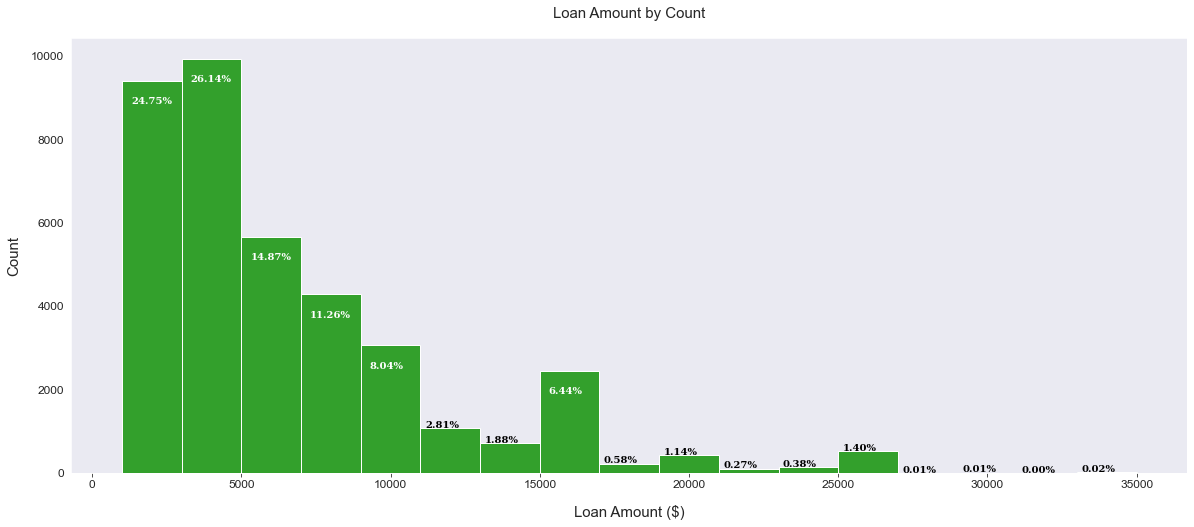

In [48]:
plt.figure(figsize=(20,8))

binsize = 1000
bin_edges = np.arange(df.LoanOriginalAmount.min(), df.LoanOriginalAmount.max()+ binsize, 2000)
n,bins,rect = plt.hist(df.LoanOriginalAmount, bins=bin_edges, color=base_color)
points=sum(n)

ax = plt.gca()
for index in range(len(rect)):
    loc=bins[index]
    count=n[index]
    percent=int(n[index])/points*100
    if percent>5:
        ax.text(loc+300,count-550,'{:0.2f}%'.format(percent), 
                 color = 'w',fontweight='bold',fontfamily='serif',fontsize='medium')
    else:
        ax.text(loc+150,count+10,'{:0.2f}%'.format(percent), 
                 color='k',fontweight='bold',fontfamily='serif',fontsize='medium') 
        
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
chart_labels('Loan Amount ($)','Count','Loan Amount by Count')

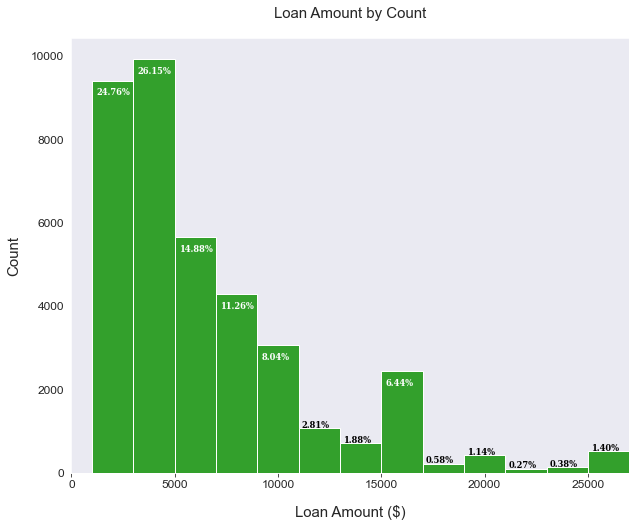

In [49]:
# I will limit the x axis to remove outliers
plt.figure(figsize=(10,8))

binsize = 1000
bin_edges = np.arange(df.LoanOriginalAmount.min(), df.LoanOriginalAmount.max()+ binsize, 2000)
n,bins,rect = plt.hist(df.LoanOriginalAmount, bins=bin_edges, color=base_color)
n = n[:-4]
bins = bins[:-4]
rect = rect[:-4]


plt.hist(df.LoanOriginalAmount, bins=bin_edges, color=base_color)
points=sum(n)

ax = plt.gca()
for index in range(len(rect)):
    loc=bins[index]
    count=n[index]
    percent=int(n[index])/points*100
    if percent>5:
        ax.text(loc+200,count-350,'{:0.2f}%'.format(percent), 
                 color = 'w',fontweight='bold',fontfamily='serif',fontsize='small')
    else:
        ax.text(loc+150,count+10,'{:0.2f}%'.format(percent), 
                 color='k',fontweight='bold',fontfamily='serif',fontsize='small') 
        
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12)
plt.xlim((0,27000));

chart_labels('Loan Amount ($)','Count','Loan Amount by Count');

- The histogram shows the distribution of Loan amounts for the listings are **right skewed**, this is expected as the higher the loan amount the lower the frequency of listings.

- The highest frequencies are approximately `25% and 26%`  for amounts between `1000 to 3000` and `3000 to 5000` repectively, followed by `15.40%` ,for amounts between `5000 to 7000`. The frequency of listings continue to reduce as the loan amount increases until the loan amount reaches between `15000 to 17000`,where there is a small spike representing `6.4%` of listings. 

- This histogram shows that most of the listings(`over 50%`) have `the smallest loan values`.

### What is the distribution of monthly loan payments?

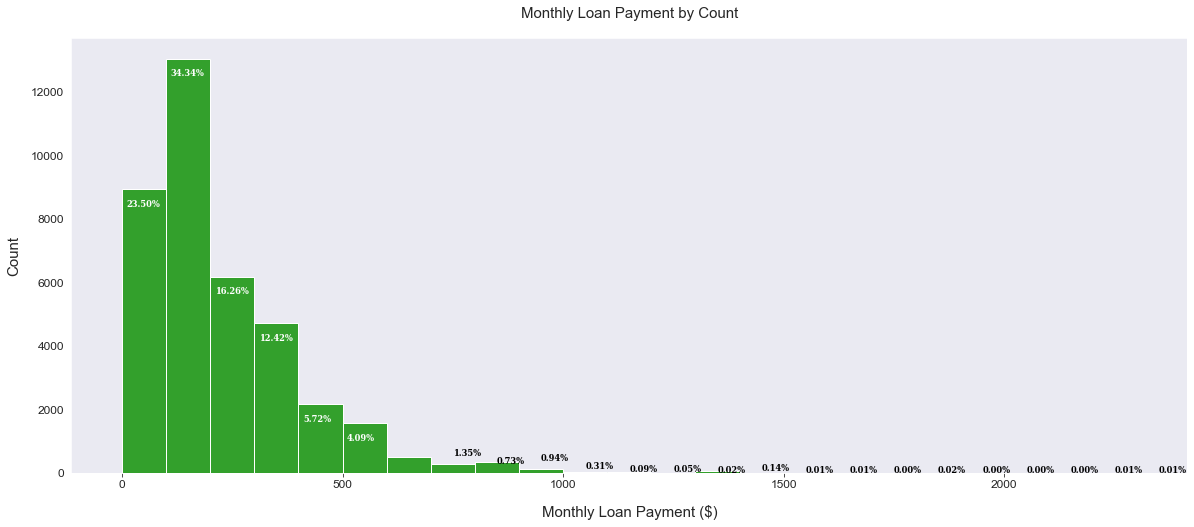

In [50]:
plt.figure(figsize=(20,8))

binsize = 100
bin_edges = np.arange(df.MonthlyLoanPayment.min(), df.MonthlyLoanPayment.max()+ binsize, 100)
n,bins,rect = plt.hist(df.MonthlyLoanPayment, bins=bin_edges, color=base_color)
points=sum(n)

ax = plt.gca()
for index in range(len(rect)):
    loc=bins[index]
    count=n[index]
    percent=int(n[index])/points*100
    if percent>3:
        ax.text(loc+10,count-550,'{:0.2f}%'.format(percent), 
                 color = 'w',fontweight='bold',fontfamily='serif',fontsize='small')
    else:
        ax.text(loc+150,count+10,'{:0.2f}%'.format(percent), 
                 color='k',fontweight='bold',fontfamily='serif',fontsize='small') 
        
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
chart_labels('Monthly Loan Payment ($)','Count','Monthly Loan Payment by Count')

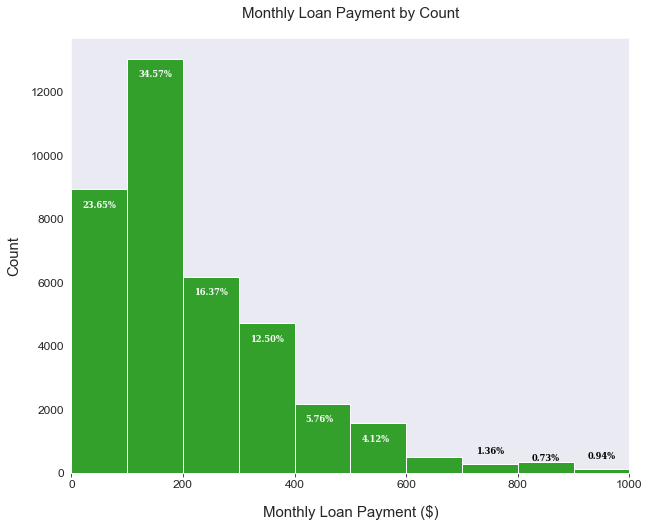

In [51]:
#I will limit the x axis to remove outliers
plt.figure(figsize=(10,8))
chart_labels('Monthly Loan Payment ($)','Count','Monthly Loan Payment by Count')

binsize = 100
bin_edges = np.arange(df.MonthlyLoanPayment.min(), df.MonthlyLoanPayment.max()+ binsize, 100)

n,bins,rect = plt.hist(df.MonthlyLoanPayment, bins=bin_edges, color=base_color)
n = n[:9]
bins = bins[:9]
rect = rect[:9]


plt.hist(df.MonthlyLoanPayment, bins=bin_edges, color=base_color)
points=sum(n)

ax = plt.gca()
for index in range(len(rect)):
    loc=bins[index]
    count=n[index]
    percent=int(n[index])/points*100
    if percent>3:
        ax.text(loc+20,count-500,'{:0.2f}%'.format(percent), 
                 color = 'w',fontweight='bold',fontfamily='serif',fontsize='small', va = 'center')
    else:
        ax.text(loc+150,count+100,'{:0.2f}%'.format(percent), 
                 color='k',fontweight='bold',fontfamily='serif',fontsize='small', ha = 'center') 
        
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12)
plt.xlim((0,1000));

- The histogram shows the distribution of MonthlyLoanPayment for the listings are right skewed, which is expected as over 50% of loan amounts are less than 5000 dollars so a lot of monthly payments will be smaller amounts. 

- The highest monthly loan repayments(34%) are between 100 to 200 dollars, followed by 25% of borrowers paying between 0 and 100 dollars

- This histogram shows that over 90% of listings have monthly loan repayments under 500 dollars.

### What is the distribution of repayment Terms for the listings in the dataset?

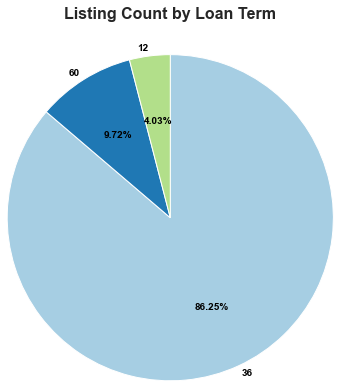

In [52]:
plt.figure(figsize = [10, 5])

Terms = df['Term'].value_counts()
labels = ['36', '60', '12']
colors = sns.color_palette('Paired')
plt.pie(Terms, labels = labels, colors = colors, startangle = 90,autopct = '%0.02f%%', 
        counterclock = False, radius = 1.5,labeldistance= 1.05, 
        textprops = {'color':'k', 'fontweight':'bold','fontsize':'10'});

plt.title('Listing Count by Loan Term', fontsize=16, y= 1.21,fontweight ='bold');

#plt.savefig('01lcatCnt.png');

- Here we see that almost 90% of listings were for a term of 36 months or 3 years.

### How are listings distributed within the Loan categories?

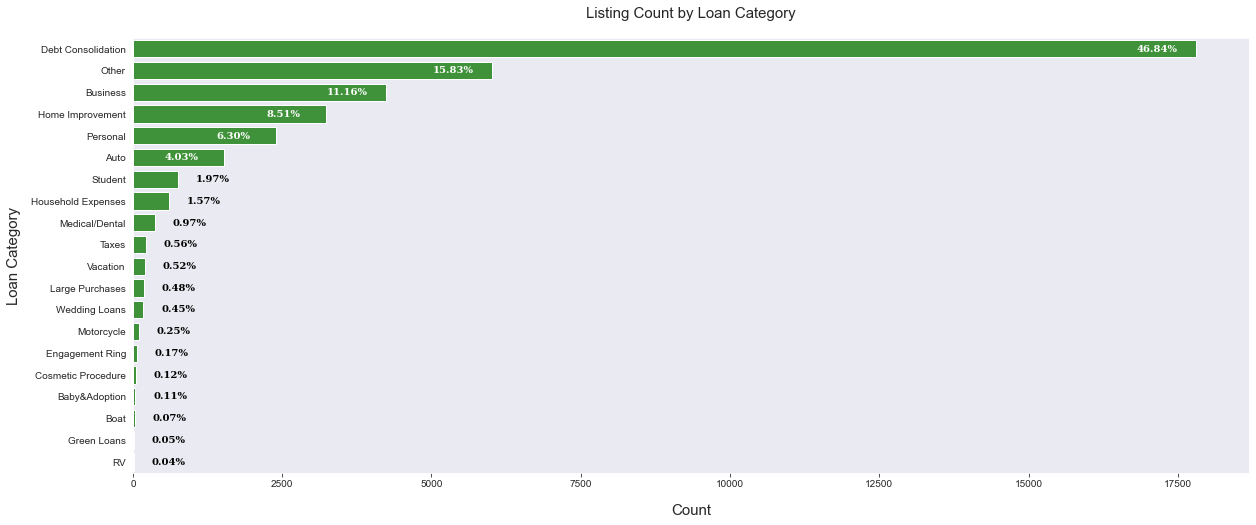

In [53]:
plt.figure(figsize = [20, 8])

order = df['LoanCategory'].value_counts().index
counts = df['LoanCategory'].value_counts()
n = df['LoanCategory'].value_counts().sum()

sns.countplot(data=df, y='LoanCategory', color=base_color, order=order);


for i in range (counts.shape[0]):
    count = counts[i]
    percent = int(count)/n*100
    if percent>2:
        plt.text(count-1000, i, '{:0.2f}%'.format(percent), va = 'center', color = 'w', 
                 fontweight='bold', fontfamily='serif',fontsize='medium')
    else:
        plt.text(count+300, i, '{:0.2f}%'.format(percent), va = 'center', color = 'k', 
                 fontweight='bold', fontfamily='serif',fontsize='medium')

chart_labels('Count','Loan Category','Listing Count by Loan Category')

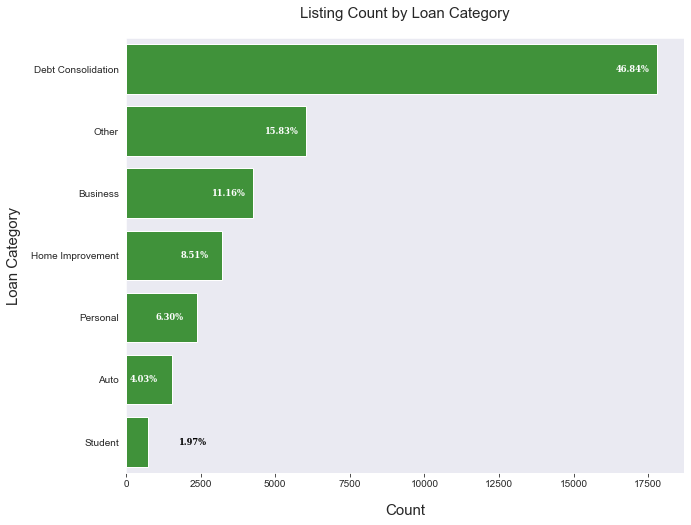

In [54]:
#I will limit the chart to Loan categories representative of over 2% of listings

plt.figure(figsize = [10, 8])

order = df['LoanCategory'].value_counts().index[:7]
counts = df['LoanCategory'].value_counts()[:7]
n = df['LoanCategory'].value_counts().sum()

sns.countplot(data=df, y='LoanCategory', color=base_color, order=order);


for i in range (counts.shape[0]):
    count = counts[i]
    percent = int(count)/n*100
    if percent>=2:
        plt.text(count-1400, i, '{:0.2f}%'.format(percent), va = 'center', color = 'w', 
                 fontweight='bold', fontfamily='serif',fontsize='small')
    else:
        plt.text(count+1000, i, '{:0.2f}%'.format(percent), va = 'center', color = 'k', 
                 fontweight='bold', fontfamily='serif',fontsize='small')
chart_labels('Count','Loan Category','Listing Count by Loan Category')

- `Debt Consolidation` had the biggest share of listings at `46.8%`. The second largest category is `Other` at `15.8%`  followed by `Business` at `11%`.

- Borrowers mostly took loans for Debt consolidation, Business purposes and Other.

### How are listings distributed within  Borrower Occupations?

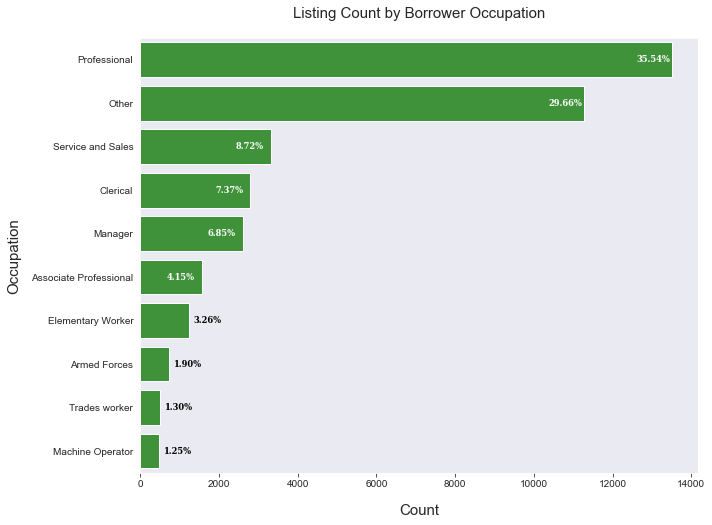

In [55]:
plt.figure(figsize = [10, 8])

order = df['Occupation'].value_counts().index
counts = df['Occupation'].value_counts()
n = df['Occupation'].value_counts().sum()

sns.countplot(data=df, y='Occupation', color=base_color, order=order);


for i in range (counts.shape[0]):
    count = counts[i]
    percent = int(count)/n*100
    if percent>=4:
        plt.text(count-900, i, '{:0.2f}%'.format(percent), va = 'center', color = 'w', 
                 fontweight='bold', fontfamily='serif',fontsize='small')
    else:
        plt.text(count+100, i, '{:0.2f}%'.format(percent), va = 'center', color = 'k', 
                 fontweight='bold', fontfamily='serif',fontsize='small')
        
chart_labels('Count','Occupation','Listing Count by Borrower Occupation')

- The `Professional` category has the largest portion of listing Occupations at `35.5%`, this is followed closely by the `Other` category with almost `30%` of listing Occupations, a distant third is `Service and Sales` which is the occupation for about `9%` of borrowers.

### What states had the highest and lowest listings?

In [56]:
#Computing some decriptive statistics on borrowers state
states_min = df.BorrowerState.value_counts().min()
print(f"The Minimum count of listings in Borrower States is {states_min}")
print('\n')
states_max = df.BorrowerState.value_counts().max()
print(f"The Maximum count of listings in Borrower States is {states_max}")

The Minimum count of listings in Borrower States is 27


The Maximum count of listings in Borrower States is 5096


#### I will look at the distribution for the Top 10 and Bottom 10 states

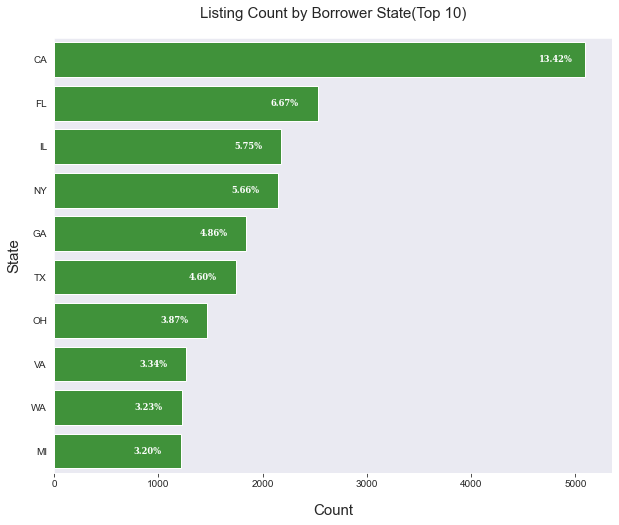

In [57]:
plt.figure(figsize = [10, 8])

order = df['BorrowerState'].value_counts().index[:10]
counts = df['BorrowerState'].value_counts()[:10]
n = df['BorrowerState'].value_counts().sum()

sns.countplot(data=df, y='BorrowerState', color=base_color, order=order);


for i in range (counts.shape[0]):
    count = counts[i]
    percent = int(count)/n*100
    plt.text(count-450, i, '{:0.2f}%'.format(percent), va = 'center', color = 'w', 
                 fontweight='bold', fontfamily='serif',fontsize='small')

chart_labels('Count','State','Listing Count by Borrower State(Top 10)')

- The Top 10 states make up over 50% of the listing distribution.

- The state with the highest number of listings is `California`, It is followed by `Florida` and `Illinois` with `6.2%` and `6.1%` repectively but they both account for less than half California's volume. Even when combined their volume is 1% less than that of California.

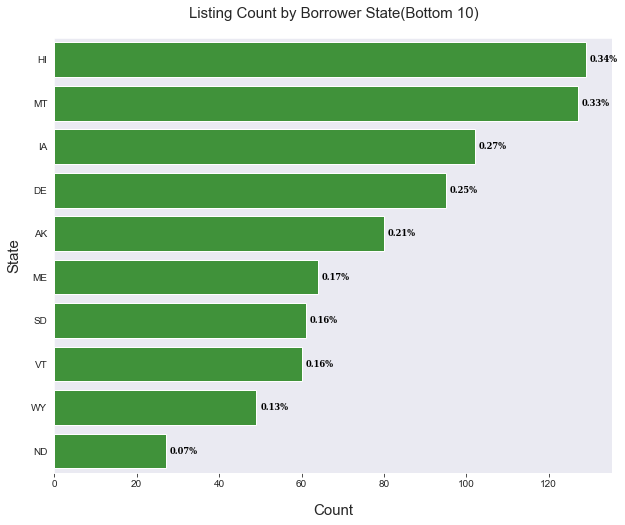

In [58]:
plt.figure(figsize = [10, 8])

order = df['BorrowerState'].value_counts().index[41:]
counts = df['BorrowerState'].value_counts()[41:]
n = df['BorrowerState'].value_counts().sum()

sns.countplot(data=df, y='BorrowerState', color=base_color, order=order);

for i in range (counts.shape[0]):
    count = counts[i]
    percent = int(count)/n*100
    plt.text(count +1, i, '{:0.2f}%'.format(percent), va = 'center', color = 'k', 
                 fontweight='bold', fontfamily='serif',fontsize='small')
    
chart_labels('Count','State','Listing Count by Borrower State(Bottom 10)')

- The bottom 10 states account for less than 3% of the listing distribution. The state with the lowest number of listings is North Dakota.

#### CA borrowers have over 5096 listings while ND at the bottom has 27 listings.

### What is the listing distribution by loan status?

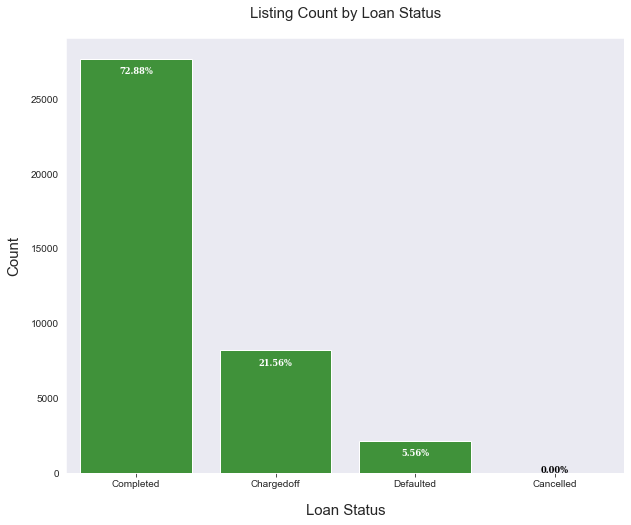

In [59]:
plt.figure(figsize = [10, 8])

n = df['LoanStatus'].value_counts().sum()
counts = df['LoanStatus'].value_counts()
order =counts.index
sns.countplot(data=df, x='LoanStatus', color=base_color, order=order);

locs, labels = plt.xticks(rotation=0) 

for loc, label in zip(locs, labels):
    count = counts[loc]
    percent = int(count)/n*100
    if percent>=5:
        plt.text(loc, count-1000, '{:0.2f}%'.format(percent), ha = 'center', color = 'w', 
                 fontweight='bold', fontfamily='serif',fontsize='small')
    else:
        plt.text(loc, count-10, '{:0.2f}%'.format(percent), ha = 'center', color = 'k', 
                 fontweight='bold', fontfamily='serif',fontsize='small')
        
chart_labels('Loan Status','Count','Listing Count by Loan Status')
#plt.savefig('01lcatCnt.png');

- Although the bulk of the loans (69%) are in `Completed` status , about a fifth of loans have been `Charged Off` this seems high especially when combined that with the proportion of `Defaulted` loans, it results in `over a third` of loan amounts that were not recovered.

### What is the distribution of `EmploymentStatus` among the borrowers?

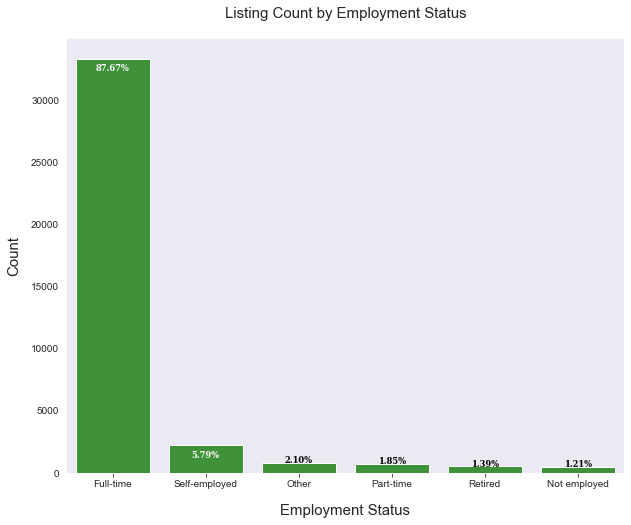

In [60]:
plt.figure(figsize = [10, 8])

n = df['EmploymentStatus'].value_counts().sum()
counts = df['EmploymentStatus'].value_counts()
order =counts.index
sns.countplot(data=df, x='EmploymentStatus', color=base_color, order=order);

locs, labels = plt.xticks() 

for loc, label in zip(locs, labels):
    count = counts[loc]
    percent = int(count)/n*100
    if percent>=5:
        plt.text(loc, count-1000, '{:0.2f}%'.format(percent), ha = 'center', color = 'w', 
                 fontweight='bold', fontfamily='serif',fontsize='small')
    else:
        plt.text(loc, count-10, '{:0.2f}%'.format(percent), ha = 'center', color = 'k', 
                 fontweight='bold', fontfamily='serif',fontsize='small')
        
chart_labels('Employment Status','Count','Listing Count by Employment Status')

- Over `85%` of borrowers are in `full-time` employment and  ` Not employed` borrowers are approxcimately `1%` of the distribution.

- Seeing as their numbers are very low, the umemployed borrowers are unlikely to be  behing the charged off or defaulted loans.I will examine this further with bivariate and multivariate plots

### What is the listing distribution by borrower credit rating?

In [61]:
df['CredRating'].value_counts()

D     7966
C     6399
B     5559
A     5195
E     4777
HR    4587
AA    3523
Name: CredRating, dtype: int64

In [62]:
# Convert CredRating to an ordered categorical variable
Ratings = ['AA','A','B','C','D','E','HR']
Credratings = pd.api.types.CategoricalDtype(ordered=True, categories=Ratings)
df['CredRating'] = df['CredRating'].astype(Credratings);

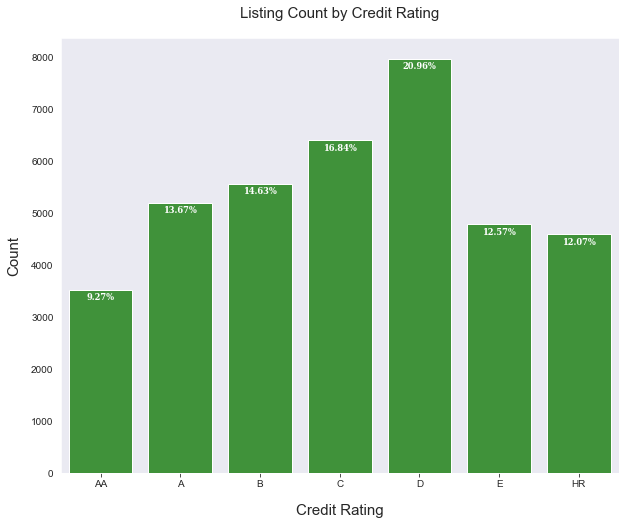

In [63]:
plt.figure(figsize = [10, 8])


n = df['CredRating'].value_counts().sum()
counts = df['CredRating'].value_counts().loc[[i for i in Ratings]]
sns.countplot(data=df, x='CredRating', color=base_color);

locs, labels = plt.xticks() 

for loc, label in zip(locs, labels):
    count = counts[loc]
    percent = int(count)/n*100
    if percent>=5:
        plt.text(loc, count-200, '{:0.2f}%'.format(percent), ha = 'center', color = 'w', 
                 fontweight='bold', fontfamily='serif',fontsize='small')
    else:
        plt.text(loc, count-10, '{:0.2f}%'.format(percent), ha = 'center', color = 'k', 
                 fontweight='bold', fontfamily='serif',fontsize='small')
        
chart_labels('Credit Rating','Count','Listing Count by Credit Rating')

- The credit rating with the most amount of listings is `D` at approximately `20%`, followed by `C` at about `17%` and `B` at `14%`.
- The highest rating `AA` has the least number of listings

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?


> The variable of interest(`Loan Amount`) has a long-tailed distribution, with a lot of listings on the low price end, and few on the high price end.The distribution shows that frequency of listings reduced as the loan amount increased. Over 50%  of listings were for loan amounts between 1000 and 5000 dollar.
    - I had to limit the x-axis of the histogram to remove outlying variables over 27,000 dollars.

> An examination of the distribution of monthly loan payments shows that  over 90% of borrowers pay 500 dollars or less for monthly repayments

> The distributions of loan categories, borrower professions, and states showed that a greater number of listings were for debt consolidation, from borrowers who worked mostly in professional fields, and were residents of California.


> It was also noted worthy that loans that are in charged off and defaulted statuses made up over 30% of the listings when combined even though the employment status distribution shows over 95%  of borrowers were in full, self or part time employment. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Altough my investigation did not find unusual distributions, I performed the following operations on the dataset to get the dataset to the desired form for exploration and visualization.:

- Merged `CreditGrade` and `ProsperRating(Alpha)` variable into one on the same ranking scheme of AA - NC.
- Grouped borrower professions into categories based on International Standard Classification of Occupations (ISCO). 
- Dropped rows where loan status is current, pastdue or finalpaymentinprogress
- Drop variables not useful or not of interest in the dataset
- Expressed the APR in percentage
- Convereted the Credit Rating variable to an ordered categorical variable
    - dropped rows where the rating was `NC` from the merged column because it means there is No Credit Information
- Replaced `employed values` in employment status column with `Full-time`
- Renamed `ListingCategory (numeric)` Category and mapped codes to descriptive names using data dictionary
- Dropped all values where `ListingCategory (numeric)`  was `Not Available`

## Bivariate Exploration

#### In the univariate exploration, I examined  listing distribution by loan category, now I will examine loan amount distribution in each listing category to see the frequency of loan amount  in each category.

In [64]:
#from my unvariate explorations, I will subset my dataset for easier bivariate analysis
Loan_Cat_sub=df[df['LoanCategory'].isin(df.LoanCategory.value_counts().index[0:7])]

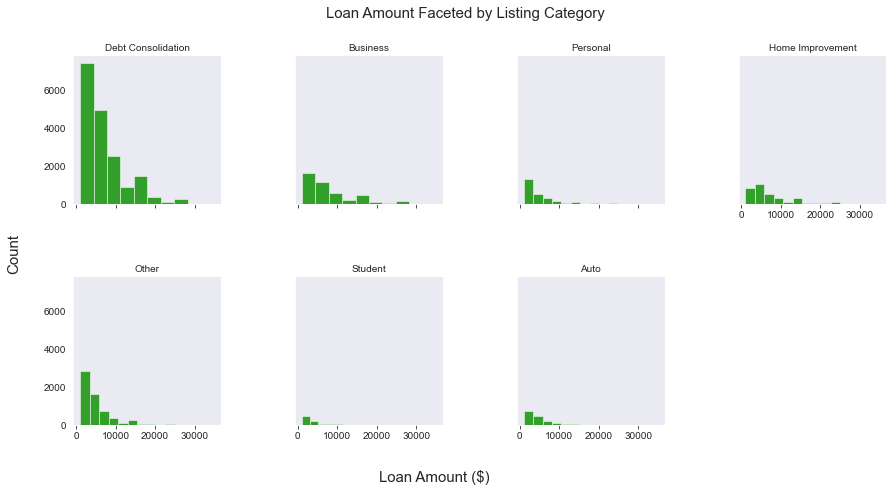

In [65]:
g = sns.FacetGrid(data = Loan_Cat_sub, col = 'LoanCategory', col_wrap=4)
g.map(plt.hist, 'LoanOriginalAmount',linewidth=.5, color=base_color);
plt.subplots_adjust(hspace=0.5, wspace=0.5);

g.set_titles('{col_name}');
g.set(xlabel='', ylabel='');


plt.suptitle("Loan Amount Faceted by Listing Category", fontsize=15, y=1.06);
g.fig.text(0.4, -0.04, s='Loan Amount ($)',fontsize= 15);
g.fig.text(-0.03, 0.45, s='Count',fontsize= 15, rotation = 90);

- In each category we see the frequency of listings continue to reduce as the loan amount increases. The Loan amount with the highest frequencies are below 5000 dollars which is consistent with what the univariate exploration of loan amount distribution showed.
- It is noteworthy that debt consolidation and business show a greater spread of Loan amounts, with a not insignificant amount reaching 20000 dollars in both categories

#### I will examine monthly payment distribution in each listing category to see the frequency of monthly payment in each category. 

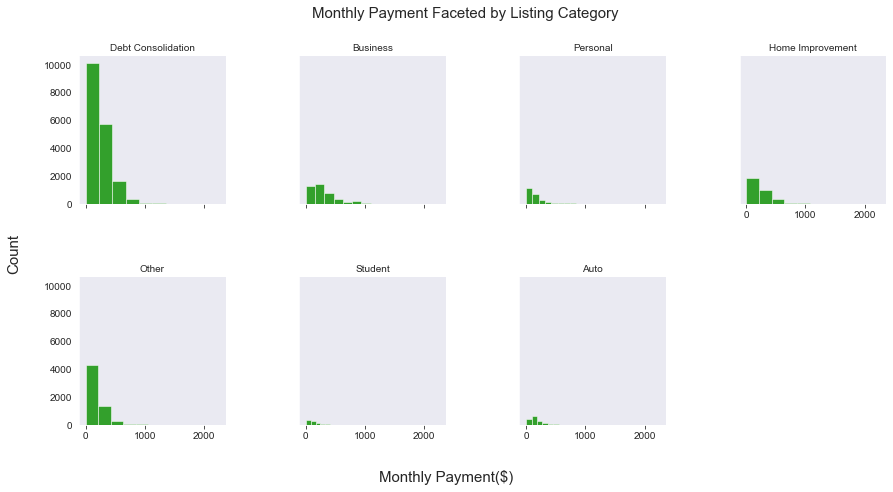

In [66]:
g = sns.FacetGrid(data = Loan_Cat_sub, col = 'LoanCategory', col_wrap=4)
g.map(plt.hist, 'MonthlyLoanPayment',linewidth=.5, color=base_color);
plt.subplots_adjust(hspace=0.5, wspace=0.5);

g.set_titles('{col_name}');
g.set(xlabel='', ylabel='');


plt.suptitle("Monthly Payment Faceted by Listing Category", fontsize=15, y=1.06);
g.fig.text(0.4, -0.04, s='Monthly Payment($)',fontsize= 15);
g.fig.text(-0.03, 0.45, s='Count',fontsize= 15, rotation = 90);

- Monthly payments are mostly 200  dollars and below which is consistent with what the univariate exploration showed.

- However, the business and debt consolidation categories have tails close to or at 1000 dollars, this indicates higher monthly payments for some borrowers in those categories. This is also consistent with the bivariate exploration of loan amounts by loan category as these categories showed a wider range of loan amounts.

#### I will investigate how loan amount  varies by borrower occupation

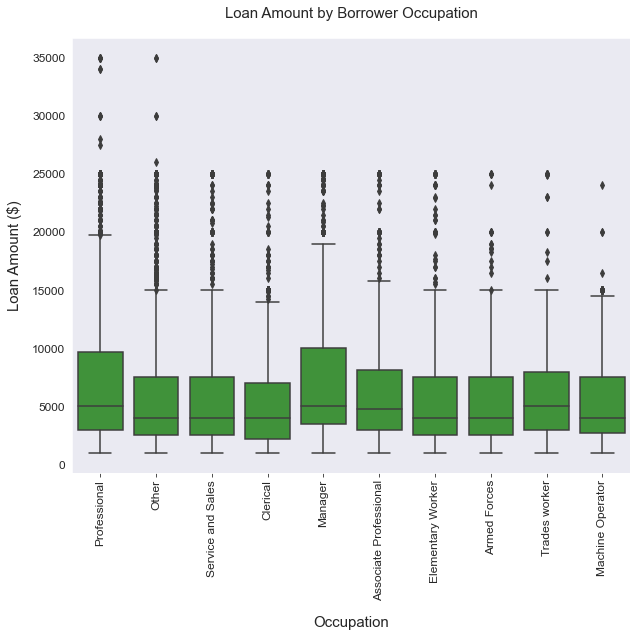

In [67]:
plt.figure(figsize=(10, 8))

order = df['Occupation'].value_counts().index

ax = sns.boxplot(x='Occupation', y='LoanOriginalAmount',data=df, 
                 color=base_color, order=order, orient='v');

plt.xticks(fontsize = 12, rotation=90);
plt.yticks(fontsize = 12);
chart_labels('Occupation','Loan Amount ($)','Loan Amount by Borrower Occupation')

The boxplot shows the median loan amount in each occupation hovers around 5000 dollars.

In the univariate exploration, `professional` job holders had the highest in listing frequency, while `Managers` ranked 5th, this chart shows that managers and `trades workers`-who ranked 9th, have slightly higher median Loan amount.

However, all occupations show a wide spread of outlying variables beyond the whiskers of the boxplot with professionals having the highest spread followed by other job holders, this is more consistent with what was observed in the univariate exploration.

#### I will examine how listing frequency in the top 5 borrower states is affected by borrowers' credit rating 

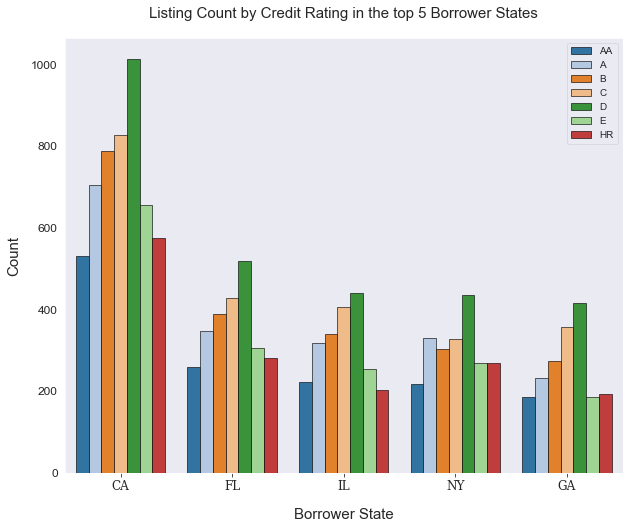

In [68]:
plt.figure(figsize=(10, 8))

top5_state_sub=df[df.BorrowerState.isin(df.BorrowerState.value_counts().index[0:5])]
order=df.BorrowerState.value_counts().index[0:5]

ax = sns.countplot(data=top5_state_sub, x='BorrowerState',palette='tab20',
             hue='CredRating', edgecolor='k', linewidth=0.6,
             order=order)
ax.legend(framealpha = 0.5)

locs, labels = plt.xticks()
plt.xticks(locs, labels, fontfamily='serif')

plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
chart_labels('Borrower State','Count','Listing Count by Credit Rating in the top 5 Borrower States')

- In each state except `New York` and `Illinois`, the frequency of the credit ratings mirrors those observed in univariate exploration, where borrowers with credit ratings D had the highest frequency, followed by those with ratings of C and B.

#### Examining the relationship between loan amount and borrower credit rating 

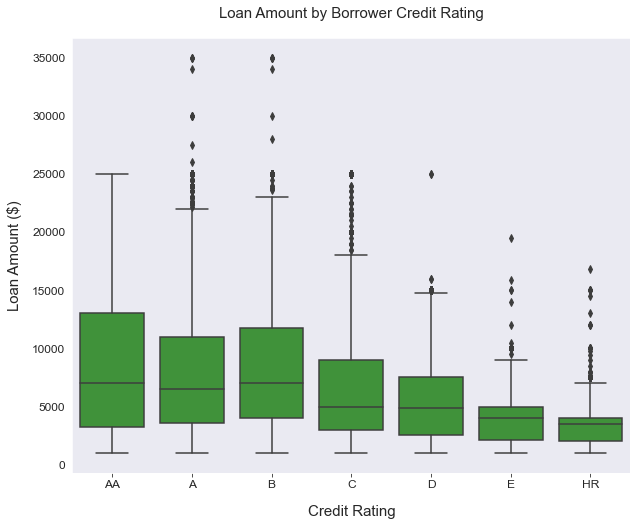

In [69]:
plt.figure(figsize=(10, 8))


ax = sns.boxplot(x='CredRating', y='LoanOriginalAmount',data=df, 
                 color=base_color, orient='v');

         
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
chart_labels('Credit Rating','Loan Amount ($)','Loan Amount by Borrower Credit Rating')

- The boxplot shows the median loan amount in each credit rating is below 7000 dollars and this decreases with credit rating as lower rating ranks have median loan amounts at 5000 dollars or below, this is consistent with small loan amounts that have been observed.

- In the univariate exploration, credit ratings C and D had the highest in listing frequency, this plot shows their loan amounts are actually way less than the AA,A and B rankings.

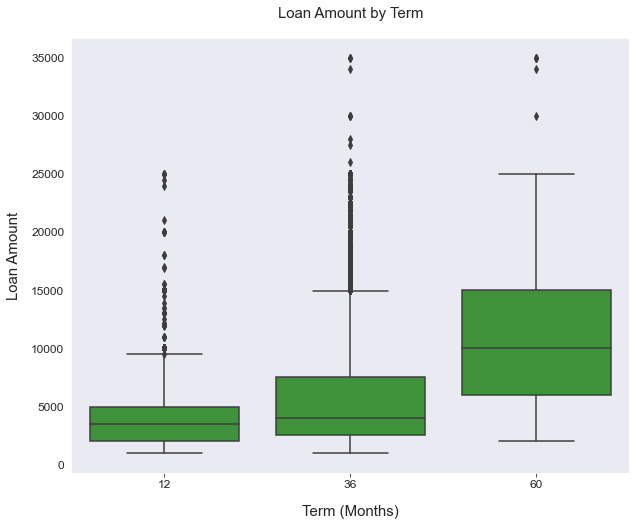

In [70]:
plt.figure(figsize=(10, 8))


ax = sns.boxplot(x='Term', y='LoanOriginalAmount',data=df, 
                 color=base_color, orient='v');

plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
chart_labels('Term (Months)','Loan Amount','Loan Amount by Term')

- The box plot shows that median loan amounts vary across terms.
- The longer the `Term` of the loan, the higher the median loan amount.

#### What is the relationship between monthly income and loan amount ?

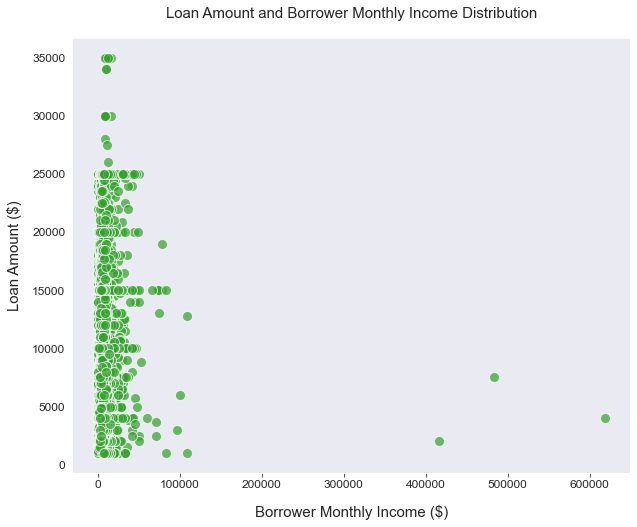

In [71]:
plt.figure(figsize=(10, 8))
plt.scatter(df.StatedMonthlyIncome, df.LoanOriginalAmount, 
            alpha=0.7, color=base_color, s=100, edgecolor='w');


plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);


chart_labels('Borrower Monthly Income ($)','Loan Amount ($)','Loan Amount and Borrower Monthly Income Distribution')

- It is interesting to note that, borrowers with higher monthly income did not loan larger amounts are evidenced by the position of outlying variables in this plot. In order to get a clearer picture of the concentration of the data, I will limit the X axis of the plot

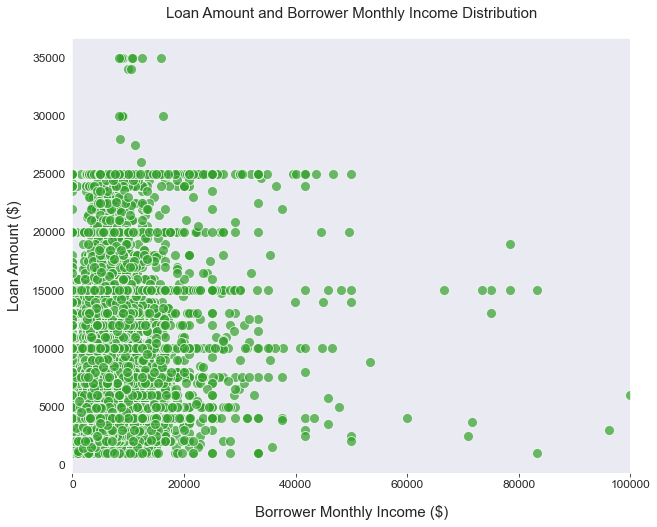

In [72]:
#i will limit the x-axis to 100000 to remove outliers
plt.figure(figsize=(10, 8))
plt.scatter(df.StatedMonthlyIncome, df.LoanOriginalAmount, 
            alpha=7/10, color=base_color, s=100, edgecolor='w');


plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);

plt.xlim((0,100000));
chart_labels('Borrower Monthly Income ($)','Loan Amount ($)','Loan Amount and Borrower Monthly Income Distribution')

- After limiting to 100000, we can see that most of the data falls in a large blob between 0 and 20000 dollars of monthly income  and 0 to 25000 dollars loan amounts.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> During the bivariate exploration I observed a relationship between credit rating and loan amount. I observed the median loan amount decrease as credit rating ranks decreased.

> I observed a relationship between the Term of the loan and loan amount, a longer loan term presented with a higher median loan amount.

> I also observed that monthly income had little effect on loan distribution as even borrowers whose income were on the higher end tended to borrow amounts not exceeding 25000. Infact, the distribution of borrowers who borrowed amounts greater than 25000 dollars were low income earners below 20000.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I did not observe any interesting relationships between the other features.

## Multivariate Exploration

### How does Borrower APR affect loan amount distribution across credit rating?

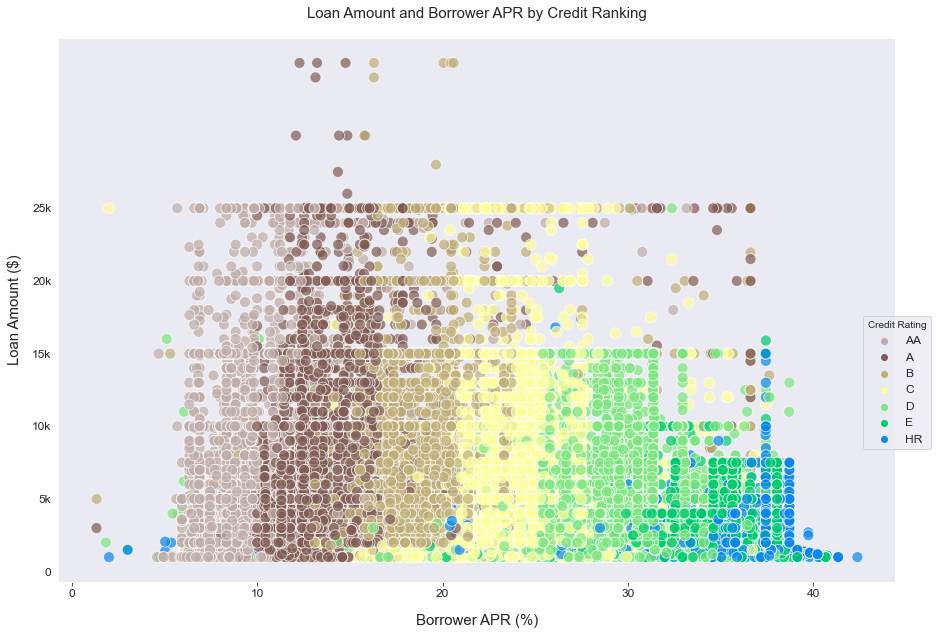

In [73]:
plt.figure(figsize=(15, 10))

ax = sns.scatterplot(x='APRPct', y='LoanOriginalAmount', data=df,
                    hue='CredRating', s=120, edgecolor='w', 
                    palette='terrain_r', alpha = 0.7); 

plt.legend(loc='best', 
           bbox_to_anchor=(1.05, 0.5), fontsize='large', title = 'Credit Rating' )
plt.yticks([0,5000,10000,15000,20000,25000],['0','5k','10k','15k','20k','25k'])


plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
chart_labels('Borrower APR (%)','Loan Amount ($)','Loan Amount and Borrower APR by Credit Ranking')

- In this chart I investigate how Borrower APR affects loan amount distribution across credit rating

- It shows that the higher a borrowers credit rating, the lower the APR rate on a loan listing. 

- For `A` and `AA` credit rating, the loan amount distribution is concentrated on loan values below 10,000 dollars but APR rates differ, they are under `10%` for credit rating `AA` and under `15%` for credit rating `A`. 

- Concentration of loan amounts for Credit ratings `C`,`D`,`E`, and `HR` start above APR of `20%`.

###  Does the effect of Borrower APR on loan amount distribution across credit rating hold true for each loan Category?

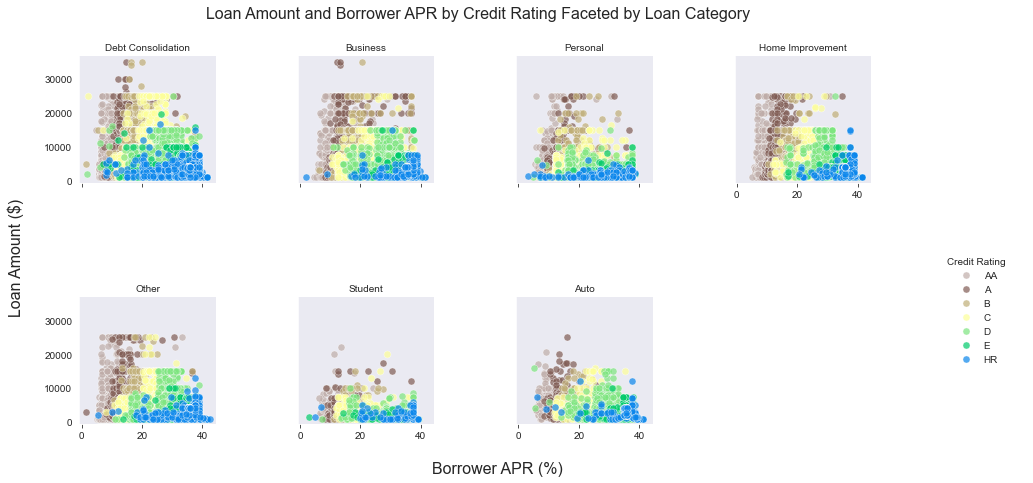

In [74]:
Loan_Cat_sub=df[df['LoanCategory'].isin(df.LoanCategory.value_counts().index[0:7])]

g = sns.FacetGrid(Loan_Cat_sub, col='LoanCategory', hue='CredRating',
                 palette='terrain_r', col_wrap=4 )

g.map(plt.scatter, 'APRPct','LoanOriginalAmount', s=50, linewidth=.5, edgecolor='w', alpha = 0.7).add_legend();

g._legend.set_title('Credit Rating')
g.set_titles('{col_name}');
g.set(xlabel='', ylabel='')



g.fig.get_children()[-1].set_bbox_to_anchor((1.1, 0.4, 0, 0));

plt.subplots_adjust(hspace=0.9, wspace=0.6);    
plt.suptitle("Loan Amount and Borrower APR by Credit Rating Faceted by Loan Category", fontsize=16, y=1.06);
g.fig.text(0.45, -0.02, s='Borrower APR (%)',fontsize = 16);
g.fig.text(-0.01, 0.35, s='Loan Amount ($)',fontsize = 16, rotation = 90);

- The trend of low APR for `AA` and `A` credit ratings holds true across `loan Categories`.

- Although `Debt Consolidation` seems to have the greatest concentration of borrowers with the worst credit rating, the APR for this category has a wider range as the chart shows borrowers with lower rankings getting low APRs on listing values `5000` and below. 

- However, all other categories have high concentrations of credit rating HR with high APR (in the `20% to 40%` range) on listing values `5000` and under.

### Compare distribution of Loan amount by credit ranking in the pre and post July 2009.

- Since there are 2 time periods marked by credit rating pre-july 09 and post-july 09. I will compare loan amount distribution by credit ranking for both time periods.

In [75]:
Loan_Cat_sub['CredRatingType'].replace({'CreditGrade':'Pre_2009-07','ProsperRating (Alpha)':'Post_2009-07'},inplace=True)

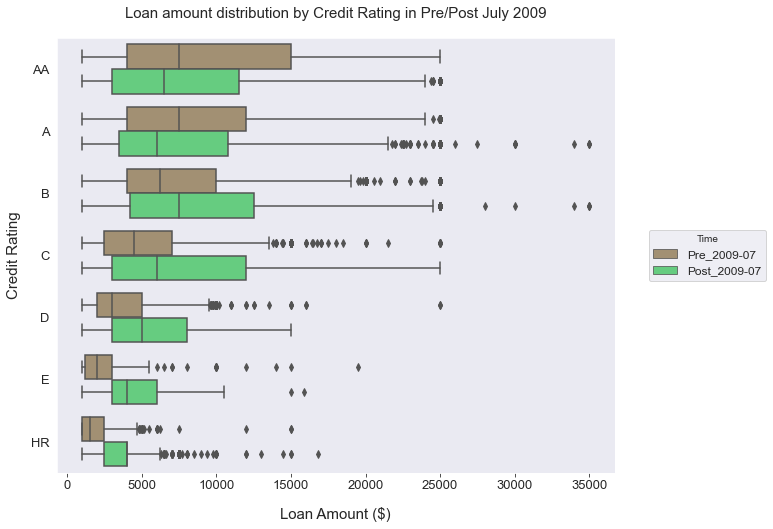

In [76]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='LoanOriginalAmount', y='CredRating', hue='CredRatingType',
                 data=Loan_Cat_sub, palette='terrain_r', orient='h');

plt.legend(title='Time', loc='center left', 
           bbox_to_anchor=(1.05, 0.5), fontsize='large');

plt.xticks(fontsize = 13);
plt.yticks(fontsize = 13);

chart_labels('Loan Amount ($)','Credit Rating','Loan amount distribution by Credit Rating in Pre/Post July 2009')

- There is a difference in Loan amount distribution between the time periods, the median loan amount distribution across all credit rankings- except `A` and `AA`- is much higher post July 2009.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I observed a strong relationship between `Borrower APR`, `loan amount` and `credit rating`. A higher credit rating often gets a lower APR rate on a loan listing.

> I then added a fourth feature `Loan Category` to the multivariate distribution of `loan amount` and `borrower APR` by `credit rating` this allowed me to observe the effects of borrower APR on loan amount and credit rating by loan category.

> The three features `loan category`,`Borrower APR`, and `credit rating` strengthened each other and added visibility to the listing distribution.

### Were there any interesting or surprising interactions between features?

> None that I observed

## Conclusions
>Through univariate, bivariate and multivariate explorations, I was able to look at features pertaining to Prosper borrowers and loan listings in the dataset to study their influences on Prosper loan distributions and my conclusion is that:

### `Loan Category,Borrower APR, and Credit Rating` are the features with the most effect on Prosper Loan listing distributions.

## References

- https://pandas.pydata.org/docs/reference/api/pandas.Index.difference.html

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.isin.html

- https://www.travistang.com/blog/-markdown-cheat-sheet